# IMPORTING LIBRARIES 

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random 
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
from sklearn.utils import shuffle
from keras.datasets import fashion_mnist
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

2024-04-26 17:24:26.246607: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# IMPORTING DATASET

In [2]:
# Using the dataset made available by keras
(X_train, y_train) , (X_test, y_test) = fashion_mnist.load_data()

# VISUALIZING DATA 

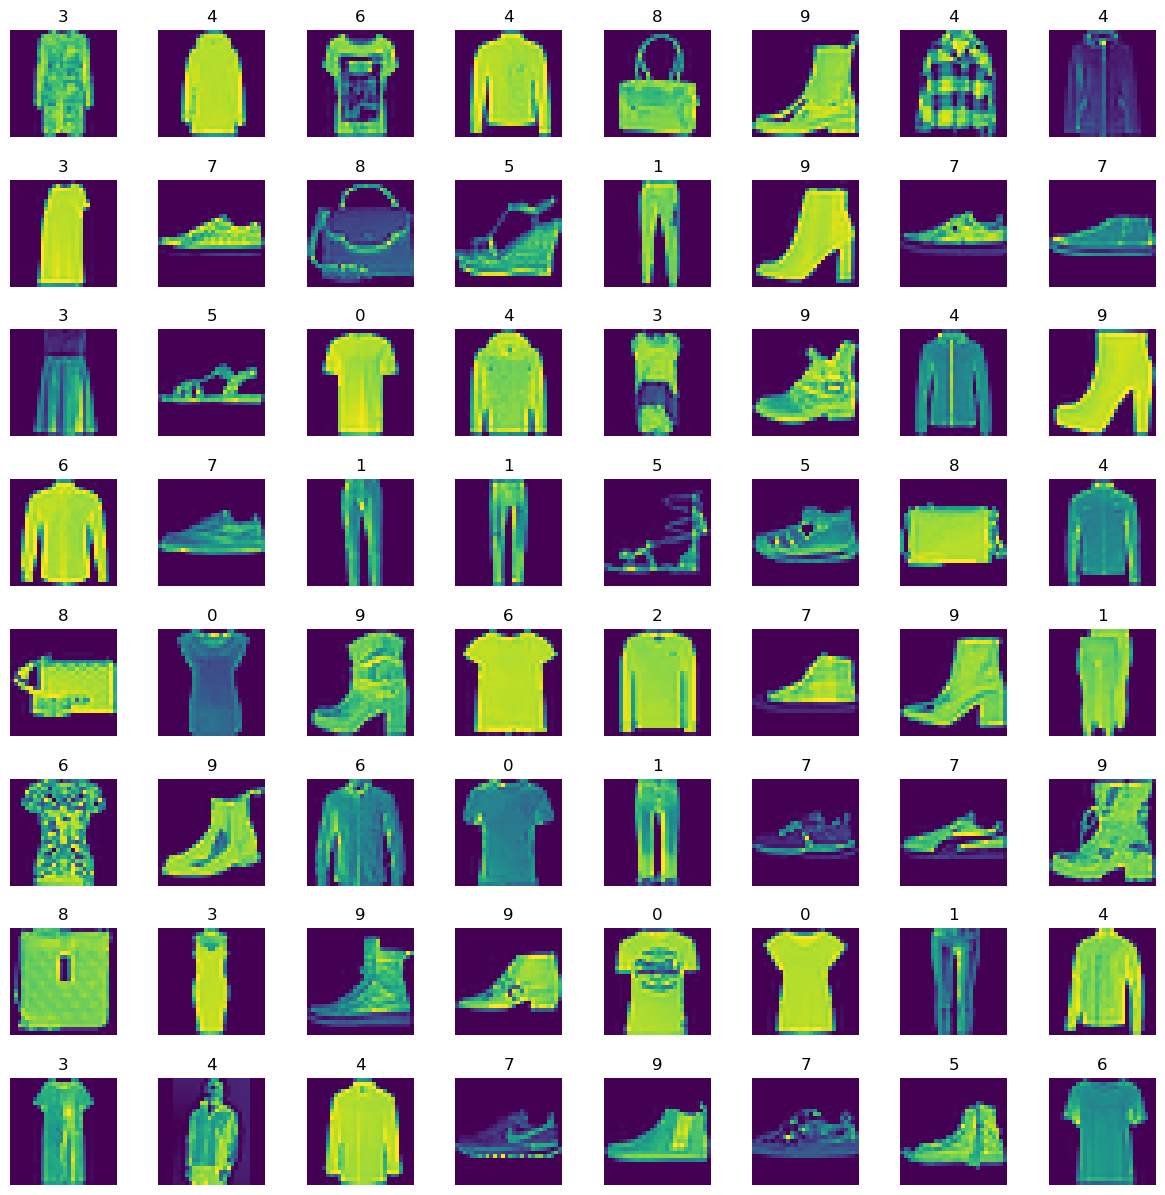

In [3]:
fig, axes = plt.subplots(8, 8, figsize = (15, 15))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, 8 * 8):
    index = np.random.randint(0, n_training) # picking a random number
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4)

# DATASET PREPROCESSING

In [4]:
# Shuffle to make sure the cnn doesn't learn the order of images
X_train, y_train = shuffle(X_train, y_train)

# Display the initial range of pixel values
print("Training set pixel values range from {} to {}".format(X_train.min(), X_train.max()))
print("Test set pixel values range from {} to {}".format(X_test.min(), X_test.max()))

# Ensuring division is done in floating point
X_train = X_train.astype('float32')  
X_test = X_test.astype('float32')

# normalize the images, instead of having pixels from 0 to 255
X_train = (X_train - 128)/128
X_test = (X_test - 128)/128

# Display the range of pixel values after normalization
print("Training set pixel values range from {} to {}".format(X_train.min(), X_train.max()))
print("Test set pixel values range from {} to {}".format(X_test.min(), X_test.max()))

# Split the training data into training and validation sets
# Here, we're reserving 20% of the training data for validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

Training set pixel values range from 0 to 255
Test set pixel values range from 0 to 255
Training set pixel values range from -1.0 to 0.9921875
Test set pixel values range from -1.0 to 0.9921875


In [5]:
# Set the number of categories or classes in the dataset
number_cat = 10

# Convert class vectors to binary class matrix i.e., one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, number_cat)
y_val = tf.keras.utils.to_categorical(y_val, number_cat)
y_test = tf.keras.utils.to_categorical(y_test, number_cat)

# Add an extra dimension to indicate the single color channel
X_train = np.expand_dims(X_train, axis=-1)
X_val = np.expand_dims(X_val, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# BUILDING CNN

In [6]:
CNN = models.Sequential()

CNN.add(layers.Conv2D(32, (5, 5), activation = 'relu', input_shape = (28, 28, 1)))
CNN.add(layers.AveragePooling2D(2, 2))

CNN.add(layers.Dropout(0.6))

CNN.add(layers.Conv2D(64, (5, 5), activation = 'relu'))

CNN.add(layers.AveragePooling2D(2, 2))

CNN.add(layers.Flatten())

CNN.add(layers.Dense(128, activation = 'relu'))

CNN.add(layers.Dropout(0.2))

CNN.add(layers.Dense(10, activation = 'softmax'))
CNN.summary()

/Users/razan./anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 12, 12, 32)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 8, 64)       │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 4, 4, 64)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 184,586 (721.04 KB)

 Trainable params: 184,586 (721.04 KB)

 Non-trainable params: 0 (0.00 B)

# COMPILING AND TRAINING CNN

In [7]:
CNN.compile(optimizer='adam',
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [8]:
history = CNN.fit(X_train, y_train, batch_size = 32, epochs = 12, 
                  verbose = 1, validation_data=(X_val, y_val))

Epoch 1/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.7195 - loss: 0.7558 - val_accuracy: 0.8605 - val_loss: 0.3898
Epoch 2/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 45s 30ms/step - accuracy: 0.8497 - loss: 0.4078 - val_accuracy: 0.8817 - val_loss: 0.3282
Epoch 3/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 45s 30ms/step - accuracy: 0.8740 - loss: 0.3488 - val_accuracy: 0.8823 - val_loss: 0.3194
Epoch 4/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 28ms/step - accuracy: 0.8806 - loss: 0.3204 - val_accuracy: 0.8938 - val_loss: 0.2893
Epoch 5/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 45s 30ms/step - accuracy: 0.8887 - loss: 0.2993 - val_accuracy: 0.8957 - val_loss: 0.2810
Epoch 6/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 47s 31ms/step - accuracy: 0.8955 - loss: 0.2844 - val_accuracy: 0.8937 - val_loss: 0.2849
Epoch 7/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 48s 32ms/step - accuracy: 0.9002 - loss: 0.2727 - val_accuracy: 0.9049 - val_loss: 0.2549
Epoch 8/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 45s 30ms/step - accuracy: 0.9052 -

# EVALUATING CNN PERFORMANCE

In [10]:
X_test = X_test.astype('float')
predicted_classes = CNN.predict(X_test)
predicted_classes = np.argmax(predicted_classes, axis=1)
y_test = np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


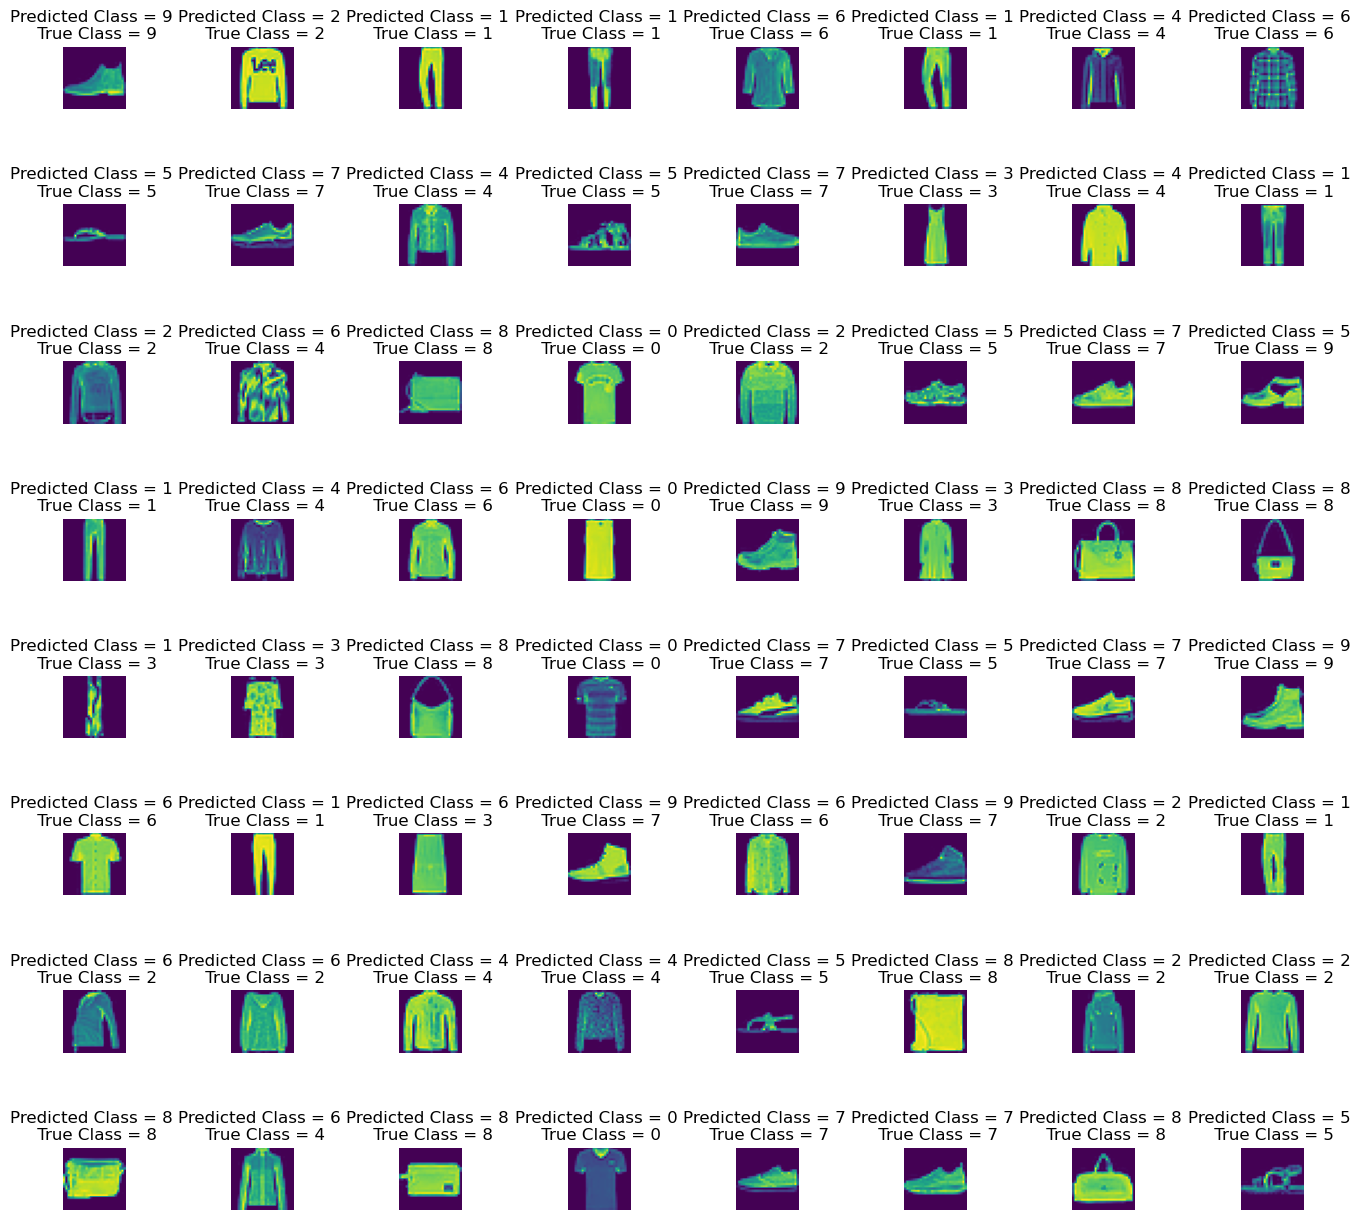

In [11]:
fig, axes = plt.subplots(8, 8, figsize = (16,16))
axes = axes.ravel() 

for i in np.arange(0, 8 * 8):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Predicted Class = {} \n True Class = {}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1.7)

<Axes: >

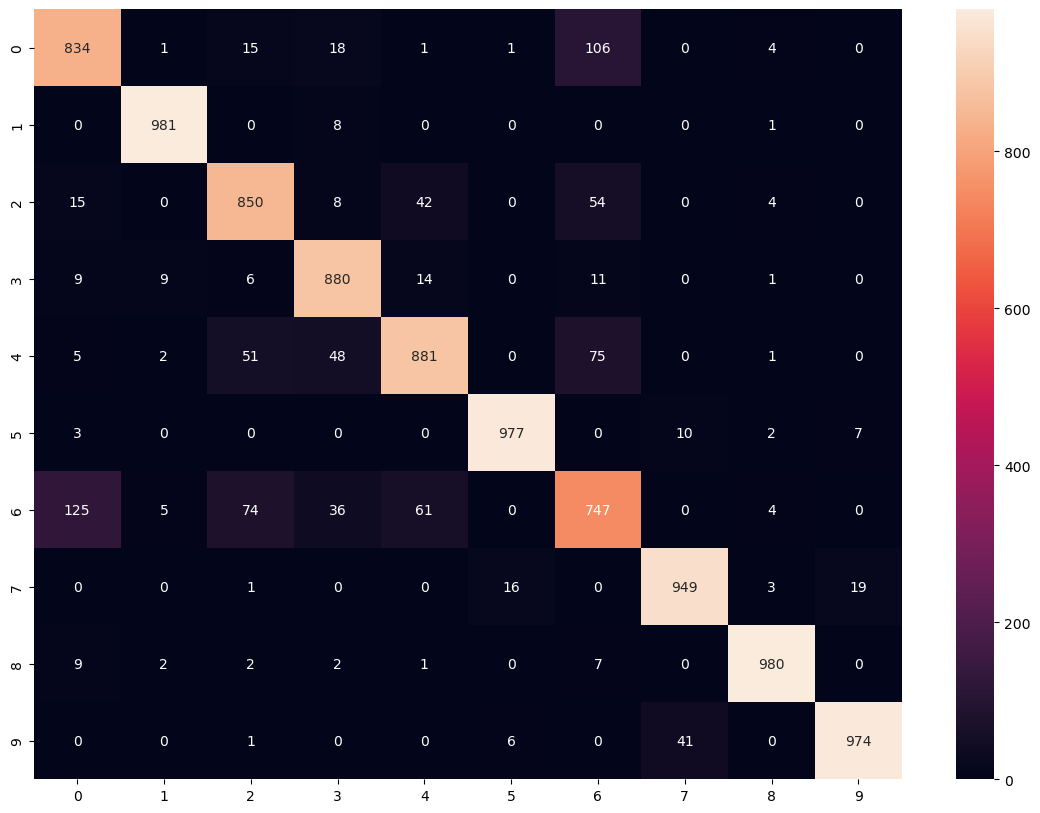

In [12]:
cm = confusion_matrix(predicted_classes, y_test)
plt.figure(figsize = (14, 10))
sns.heatmap(cm, annot = True, fmt = 'd')

In [13]:
target_names = ['class {}'.format(i) for i in range(10)]
print(classification_report(y_test, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     class 0       0.85      0.83      0.84      1000
     class 1       0.99      0.98      0.99      1000
     class 2       0.87      0.85      0.86      1000
     class 3       0.95      0.88      0.91      1000
     class 4       0.83      0.88      0.85      1000
     class 5       0.98      0.98      0.98      1000
     class 6       0.71      0.75      0.73      1000
     class 7       0.96      0.95      0.95      1000
     class 8       0.98      0.98      0.98      1000
     class 9       0.95      0.97      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [14]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and validation loss')

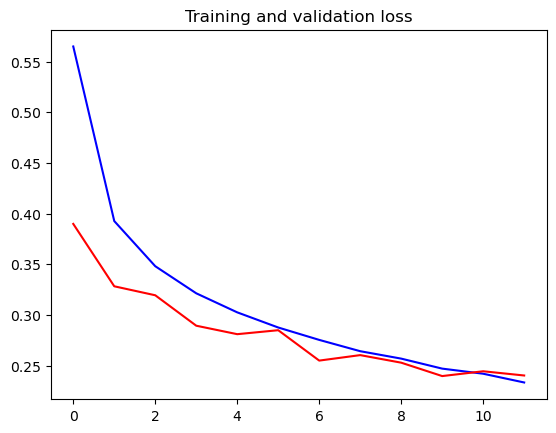

In [15]:
epochs = range(len(accuracy))
plt.plot(epochs, loss, 'b', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
plt.title('Training and validation loss')

Text(0.5, 1.0, 'Training and validation Accuracy')

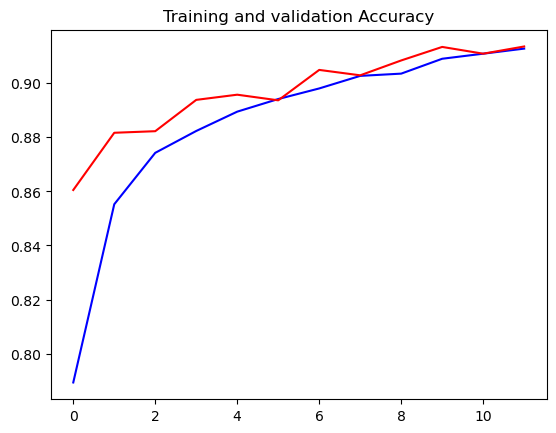

In [16]:
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b', label = 'Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label = 'Validation Accuracy')
plt.title('Training and validation Accuracy')